#Linear Programming Assignment

##Set 03 Problem 3

Feasible corners: ['(2.167, 0.000)', '(7.000, 0.000)']


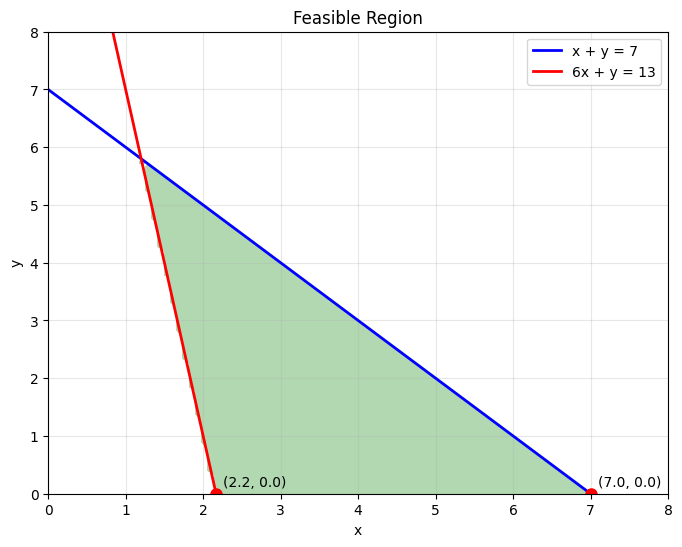


Optimal corner: (7, 0)
Maximum z = x + y: 7.000

Built-in solver: x=7.000, y=0.000, z=7.000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

constraints = [
    lambda x, y: x + y <= 7,
    lambda x, y: 6*x + y >= 13,
    lambda x, y: x >= 0,
    lambda x, y: y >= 0
]

# Finding corner points
corners = []

corners.append((13/6, 0))

corners.append((0, 7))

A = np.array([[1, 1], [6, 1]])
b = np.array([7, 13])
corners.append(tuple(np.linalg.solve(A, b)))

corners.append((7, 0))


feasible_corners = [(x, y) for x, y in corners if all(c(x, y) for c in constraints)]
print("Feasible corners:", [f"({x:.3f}, {y:.3f})" for x, y in feasible_corners])


plt.figure(figsize=(8, 6))
x_vals = np.linspace(0, 8, 400)
plt.plot(x_vals, 7 - x_vals, 'b-', label='x + y = 7', linewidth=2)
plt.plot(x_vals, 13 - 6*x_vals, 'r-', label='6x + y = 13', linewidth=2)

xx, yy = np.meshgrid(np.linspace(0, 8, 100), np.linspace(0, 8, 100))
feasible = (xx + yy <= 7) & (6*xx + yy >= 13) & (xx >= 0) & (yy >= 0)
plt.contourf(xx, yy, feasible, levels=[0.5, 1.5], alpha=0.3, colors='green')

for x, y in feasible_corners:
    plt.plot(x, y, 'ro', markersize=8)
    plt.annotate(f'({x:.1f}, {y:.1f})', (x, y), xytext=(5, 5), textcoords='offset points')

plt.xlim(0, 8); plt.ylim(0, 8)
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(True, alpha=0.3)
plt.title('Feasible Region'); plt.show()

# Maximize objective function
obj_values = [x + y for x, y in feasible_corners]
optimal_idx = np.argmax(obj_values)
optimal_corner = feasible_corners[optimal_idx]
print(f"\nOptimal corner: {optimal_corner}")
print(f"Maximum z = x + y: {obj_values[optimal_idx]:.3f}")

result = linprog([-1, -1], A_ub=[[1, 1], [-6, -1]], b_ub=[7, -13], bounds=[(0, None), (0, None)])
print(f"\nBuilt-in solver: x={result.x[0]:.3f}, y={result.x[1]:.3f}, z={-result.fun:.3f}")

The built in solver gave me the same anwser that I've got. The shape of the feasible region is a tiangle. The graph shows that the first vertex is (1.2, 5.8), second is (7, 0), and third is (2.16667, 0).

## Set 04 Problem 6

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

print("LaTeX:")
print("Maximize: $R = 266x + 190y$")
print("Subject to:")
print("$22x + 11y \\leq 803$")
print("$78x + 65y \\leq 3445$")
print("$x \\geq 0, y \\geq 0$")

hours = [22, 11]; material = [78, 65]; prices = [266, 190]
total_hours, total_material = 803, 3445

corners = [(0,0), (total_hours/hours[0],0), (0,total_hours/hours[1]),
           (total_material/material[0],0), (0,total_material/material[1])]
A = np.array([hours, material]); b = np.array([total_hours, total_material])
corners.append(tuple(np.linalg.solve(A, b)))

feasible = [(x,y) for x,y in corners if (hours[0]*x+hours[1]*y<=total_hours) and
           (material[0]*x+material[1]*y<=total_material) and x>=0 and y>=0]
print(f"\nFeasible corners: {feasible}")

revenues = [prices[0]*x+prices[1]*y for x,y in feasible]
opt_corner = feasible[np.argmax(revenues)]
print(f"Optimal: {opt_corner}, Revenue: ${revenues[np.argmax(revenues)]:.2f}")

result = linprog([-p for p in prices], A_ub=[hours, material],
                 b_ub=[total_hours, total_material], bounds=[(0,None)]*2)
print(f"Solver: ({result.x[0]:.1f}, {result.x[1]:.1f}), Revenue: ${-result.fun:.2f}")

LaTeX:
Maximize: $R = 266x + 190y$
Subject to:
$22x + 11y \leq 803$
$78x + 65y \leq 3445$
$x \geq 0, y \geq 0$

Feasible corners: [(0, 0), (36.5, 0), (0, 53.0), (np.float64(25.0), np.float64(23.0))]
Optimal: (np.float64(25.0), np.float64(23.0)), Revenue: $11020.00
Solver: (25.0, 23.0), Revenue: $11020.00


The anwser that the built in solver gave me, is the same answer that I've got in the question. They should produce 25 deluxe models and 23 standard models to get the maximum revenue of $11,020.